# G2M Case Study: Insight for Cab Investment Firm


* Review the Source Documentation 
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Create master data and explain the relationship
* Identify and remove duplicates
* Perform other analysis like NA value and outlier detection

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Importing the data

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')

# 2. Data Exploration

### Cab Data Summary

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
cab_data.describe()

Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000

In [5]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
# convert the 'Date' column to datetime format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [7]:
# we can add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Profit  
0         370.95       313.635  57.315  
1         358.52       334.854  23.666  
2         125.20        97.632  27.568  
3         377.40       351.602  25.798  
4         114.62        97.776  16.844

In [8]:
print('Cab Company counts')
cab_data['Company'].value_counts()

Cab Company counts


Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [9]:
print('Cab City counts')
cab_data['City'].value_counts()

Cab City counts


NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [10]:
#grouping of cities by state
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Profit State  
0         370.95       313.635  57.315    GA  
1         358.52       334.854  23.666    GA  
2         125.20        97.632  27.568    GA  
3         377.40       351.602  25.798    GA  
4         114.62        97.776  16.844    GA

In [11]:
cab_data['State'].value_counts()

NY        99885
CA        70888
IL        56625
DC        43737
MA        29692
TX        11913
VALLEY     8519
WA         7997
GA         7557
FL         6454
AZ         3995
COUNTY     3982
CO         3825
TN         3010
PA         1313
Name: State, dtype: int64

In [12]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: State, dtype: int64

### City Data Summary

In [13]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
city_data.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [15]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [16]:
# Changing data type
city_data['Population'] = city_data['Population'].str.replace(",", "").astype(int)
city_data['Users'] = city_data['Users'].str.replace(",", "").astype(int)

city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [17]:
city_data.describe()

Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

### Customer ID Summary

In [18]:
customer_data.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [21]:
customer_data.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [22]:
customer_data['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### Transaction ID Summary

In [23]:
transaction_data.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [24]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [25]:
transaction_data.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [26]:
transaction_data['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [27]:
# Print the shapes of the datasets in a tabular format
print("Dataset\t\t\tShape")
print("-" * 35)
print("Cab Data\t\t{}\nCustomer Data\t\t{}\nTransaction Data\t{}\nCity Data\t\t{}".format(cab_data.shape, \
                                                                                          customer_data.shape, \
                                                                                          transaction_data.shape, \
                                                                                          city_data.shape))


Dataset			Shape
-----------------------------------
Cab Data		(359392, 9)
Customer Data		(49171, 4)
Transaction Data	(440098, 3)
City Data		(20, 3)


### Create Master Data

In [28]:
# Merge all datasets at once
master_data = (
    cab_data
    .merge(transaction_data, on="Transaction ID")
    .merge(city_data, on="City")
    .merge(customer_data, on="Customer ID")
)
master_data.head()

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip    Profit State  Customer ID Payment_Mode  \
0         370.95      313.6350   57.3150    GA        29290         Card   
1         598.70      317.4228  281.2772    GA        29290         Cash   
2         792.05      597.4020  194.6480    GA        29290         Card   
3         358.52      334.8540   23.6660    GA        27703         Card   
4         721.10      467.1192  253.9808    GA        27703         Card   

   Population  Users Gender  Age  Income (USD/Month)  
0      814885  24701   Male   28               10813  
1      814885  24701   Male   28               10813  
2      814885  24701   Male   28               10813  
3      814885  24701   Male   27                9237  
4      814885  24701   Male   27                9237

In [29]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   State               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Population          359392 non-null  int32         
 12  Users               359392 non-null  int32         
 13  Gender              359392 no

In [30]:
dir(master_data)

['Age',
 'City',
 'Company',
 'Gender',
 'Payment_Mode',
 'Population',
 'Profit',
 'State',
 'T',
 'Users',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__'

In [31]:
master_data.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Profit                301825
State                     13
Customer ID            46148
Payment_Mode               2
Population                19
Users                     19
Gender                     2
Age                       48
Income (USD/Month)     22725
dtype: int64

In [32]:
master_data.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

              Profit    Customer ID    Population          Users  \
count  359392.000000  359392.000000  3.593920e+05  359392.000000   
mean      137.253198   19191.652115  3.132198e+06  158365.582267   
std       160.311840   21012.412463  3.315194e+06  100850.051020   
min      -220.060000       1.000000  2.489680e+05    3643.000000   
25%        28.012000    2705.000000  6.712380e+05   80021.000000   
50%        81.962000    7459.000000  1.595037e+06  144132.000000   
75%       190.030000   36078.000000  8.405837e+06  302149.000000   
max      1463.966000   60000.000000  8.405837e+06  302149.000000   

                 Age  Income (USD/Month)  
count  359392.000000       359392.000000  
mean       35.336705        15048.822937  
std        12.594234         7969.409482  
min        18.000000         2000.000000  
25%        25.000000         8424.000000  
50%        33.000000        14685.000000  
75%        42.000000        21035.000000  
max        65.000000        35000.000000

In [33]:
# Group by 'Company' and sum profits
grouped_profit = master_data.groupby('Company')['Profit'].sum().reset_index()
grouped_profit.head()

Company        Profit
0    Pink Cab  5.307328e+06
1  Yellow Cab  4.402037e+07

# 3. Visualization

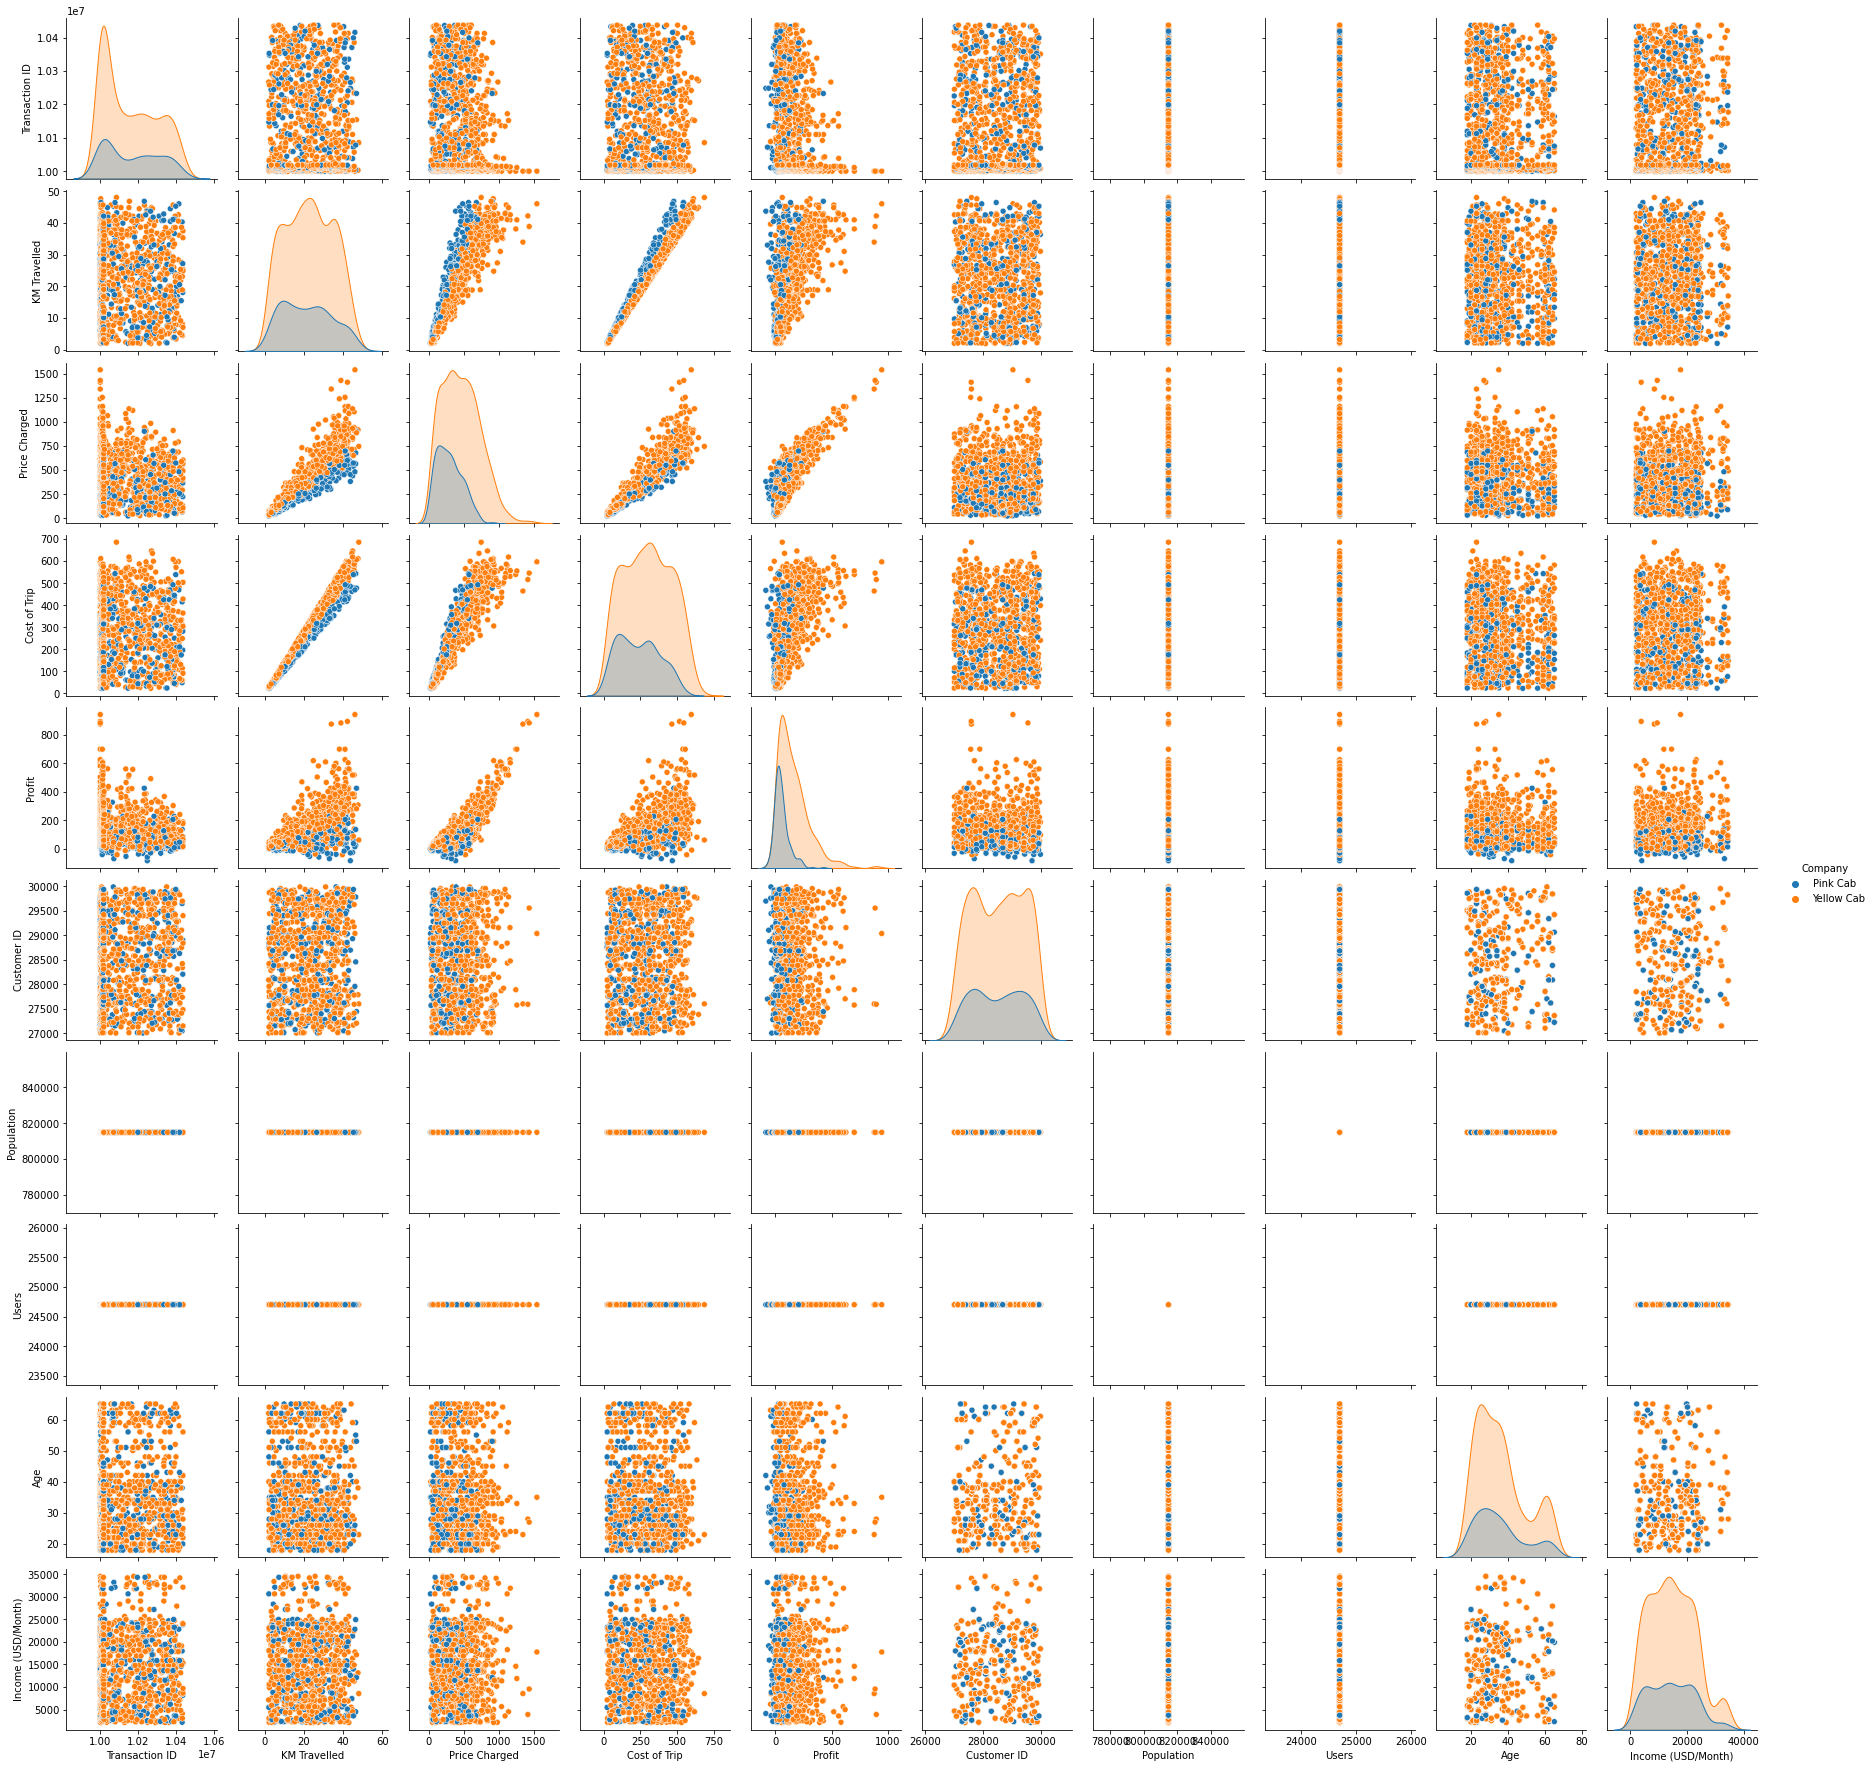

In [34]:
sns.pairplot(master_data.head(1000), hue='Company')

In [35]:
# Generate correlation matrix
data_corr = master_data.corr()
data_corr

Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Profit                   -0.087130      0.462768       0.864154      0.486056   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   

                      Profit  Customer ID  Population     Users       Age  \
Transaction ID     -0.087130    -0.016912    0.023868  0.013526 -0.001267   
KM Travelled        0.462768     0.000389   -0.002311 -0.000428 -0.000369   
Price Charged       0.864154    -0.177324    0.326589  0.281061 -0.003084   
Cost of Trip        0.486056     0.003077    0.015108  0.023628 -0.000189   
Profit              1.000000    -0.306527    0.544079  0.457758 -0.005093   
Customer ID        -0.306527     1.000000   -0.647052 -0.610742 -0.004735   
Population          0.544079    -0.647052    1.000000  0.915490 -0.009002   
Users               0.457758    -0.610742    0.915490  1.000000 -0.005906   
Age                -0.005093    -0.004735   -0.009002 -0.005906  1.000000   
Income (USD/Month)  0.006148    -0.013608    0.011868  0.010464  0.003907   

                    Income (USD/Month)  
Transaction ID               -0.001570  
KM Travelled                 -0.000544  
Price Charged                 0.003228  
Cost of Trip                 -0.000633  
Profit                        0.006148  
Customer ID                  -0.013608  
Population                    0.011868  
Users                         0.010464  
Age                           0.003907  
Income (USD/Month)            1.000000

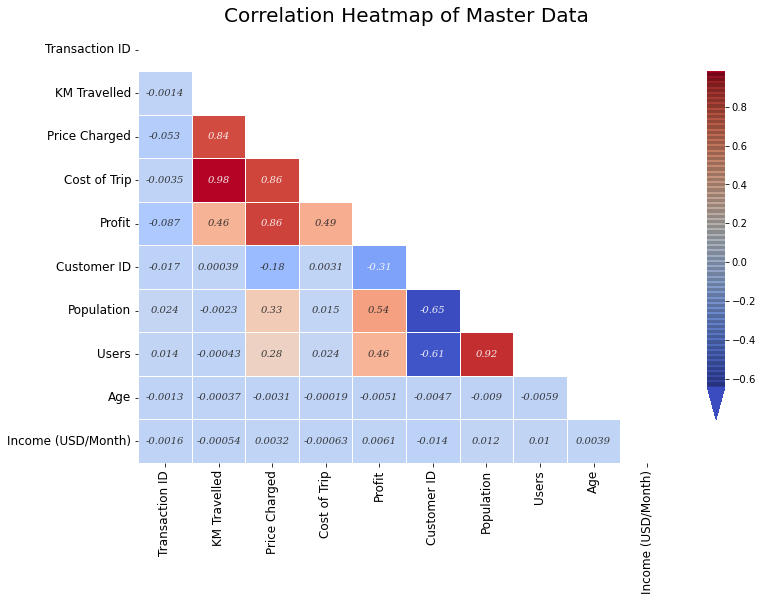

In [36]:
#Plotting Heatmap

# Define the figure size
plt.figure(figsize=(12, 8))

# Customize annotation parameters
annot_kws = {
    'fontsize': 10,         # Font size
    'fontstyle': 'italic',  # Font style
    'fontfamily': 'serif',  # Font family
    'alpha': 0.9            # Transparency of the text
}

# Customize color bar parameters
cbar_kws = {
    "shrink": 0.8,          # Size of the color bar
    'extend': 'min',        # Extending the color bar end like pointed
    'extendfrac': 0.1,      # Adjusting the extension of the color bar
    "drawedges": True       # Drawing lines (edges) on the color bar
}


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# Generate heatmap
ax = sns.heatmap(data_corr, mask=mask, cmap='coolwarm', annot=True, linewidths=1, annot_kws=annot_kws, cbar_kws=cbar_kws)

# Set title
plt.title('Correlation Heatmap of Master Data', fontsize=20)

# Set the size of text
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Rotate x and y labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()

We observe strong positive correlations between the following variables:

- Population vs Users
- KM Travelled vs Cost of Trip


### Exploratory Data Analysis

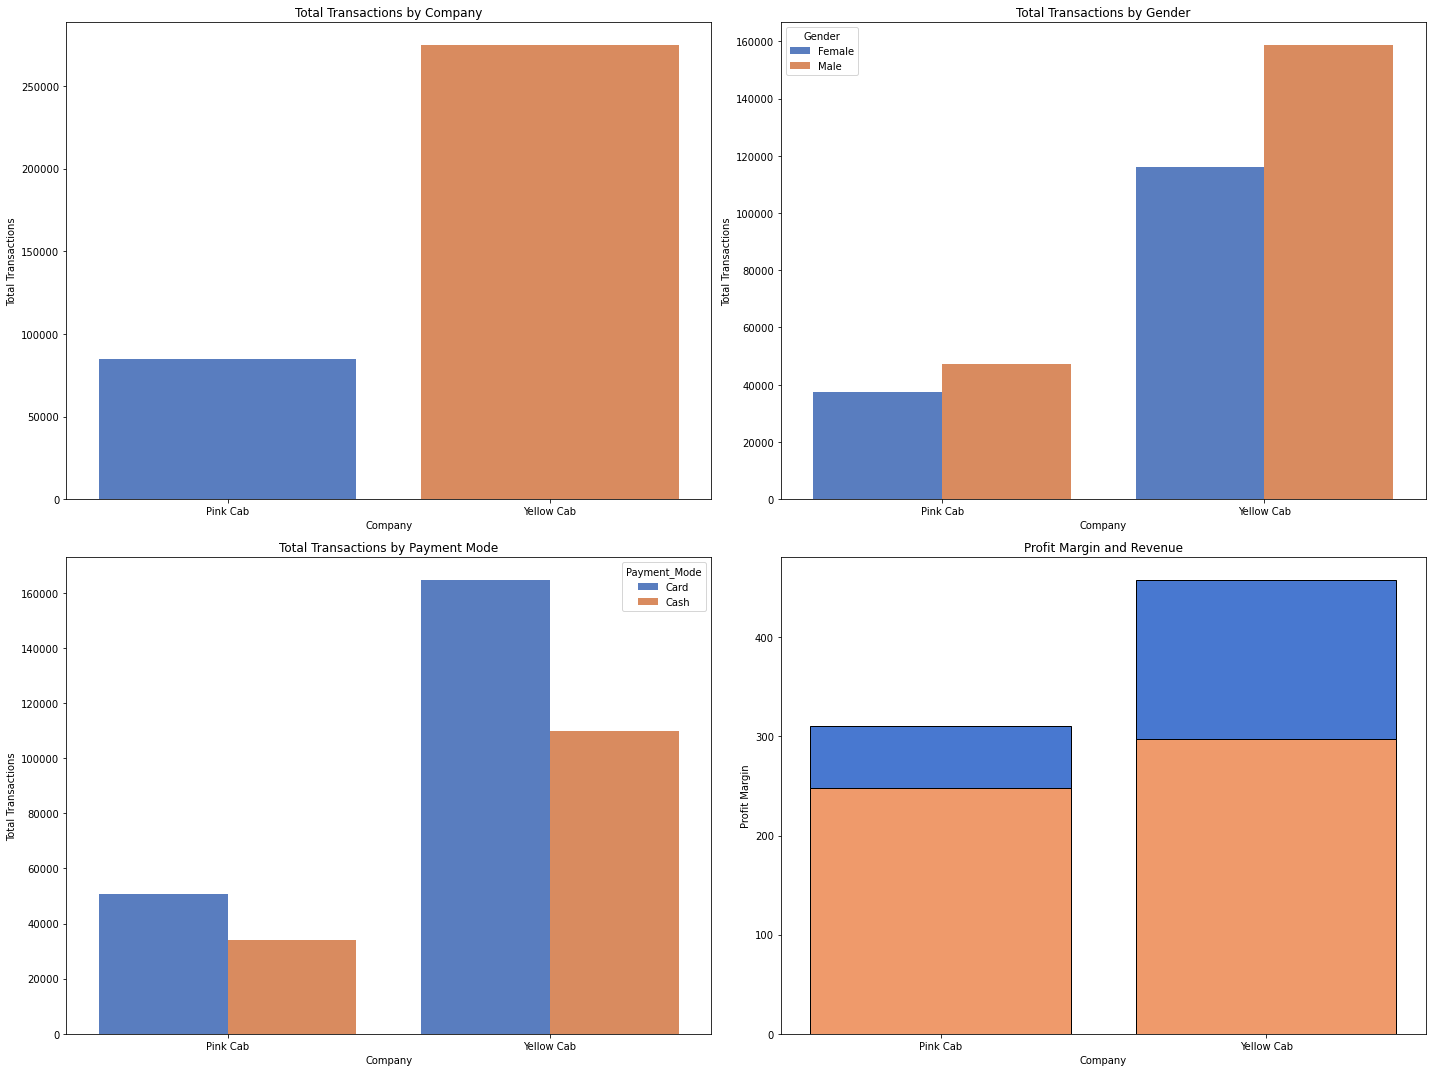

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate profit margin
company = master_data.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
profit_margin = (price_charged - cost_trip) / price_charged

# Define the color palette
colors = sns.color_palette("muted")

# Define lighter shades for revenue and profit bars
revenue_color = sns.light_palette(colors[0])[5]  # lighter shade of colors[0]
profit_color = sns.light_palette(colors[1])[4]   # lighter shade of colors[1]

# Define the figure size
fig = plt.figure(figsize=(20, 11))

# Plot 1: Total Transactions by Company
ax1 = fig.add_subplot(2, 2, 1)
group1 = master_data.groupby('Company')['Transaction ID'].count().reset_index()
sns.barplot(data=group1, x='Company', y='Transaction ID', palette=colors, ax=ax1)
ax1.set_title("Total Transactions by Company")
ax1.set_xlabel("Company")
ax1.set_ylabel("Total Transactions")

# Plot 2: Total Transactions by Gender
ax2 = fig.add_subplot(2, 2, 2)
group2 = master_data.groupby(['Company', 'Gender'])['Transaction ID'].count().reset_index()
sns.barplot(data=group2, x="Company", hue="Gender", y='Transaction ID', palette=colors, ax=ax2)
ax2.set_title("Total Transactions by Gender")
ax2.set_xlabel("Company")
ax2.set_ylabel("Total Transactions")

# Plot 3: Total Transactions by Payment Mode
ax3 = fig.add_subplot(2, 2, 3)
group3 = master_data.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count().reset_index()
sns.barplot(data=group3, x="Company", hue="Payment_Mode", y='Transaction ID', palette=colors, ax=ax3)
ax3.set_title("Total Transactions by Payment Mode")
ax3.set_xlabel("Company")
ax3.set_ylabel("Total Transactions")

# Plot 4: Profit Margin and Revenue
ax4 = fig.add_subplot(2, 2, 4)
sns.barplot(data=profit_margin.reset_index(), x="Company", y=0, palette=colors, ax=ax4)
ax4.set_title("Profit Margin and Revenue")
ax4.set_xlabel("Company")
ax4.set_ylabel("Profit Margin")

# Add bars for Revenue and Profit with lighter shades
ax4.bar(company.groups.keys(), price_charged.values, edgecolor='black', label="Revenue", color=revenue_color)
ax4.bar(company.groups.keys(), cost_trip.values, edgecolor='black', label="Profit", color=profit_color)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


We can see that:
- Yellow Cab is more popular than Pink Cab, as evidenced by the higher total number of transactions.
- Across both Yellow Cab and Pink Cab, there are more transactions by males compared to females. However, Yellow Cab is preferred by both males and females.
- Card payment is more popular than cash payment in both Yellow Cab and Pink Cab.
- Yellow Cab is more profitable compared to Pink Cab.

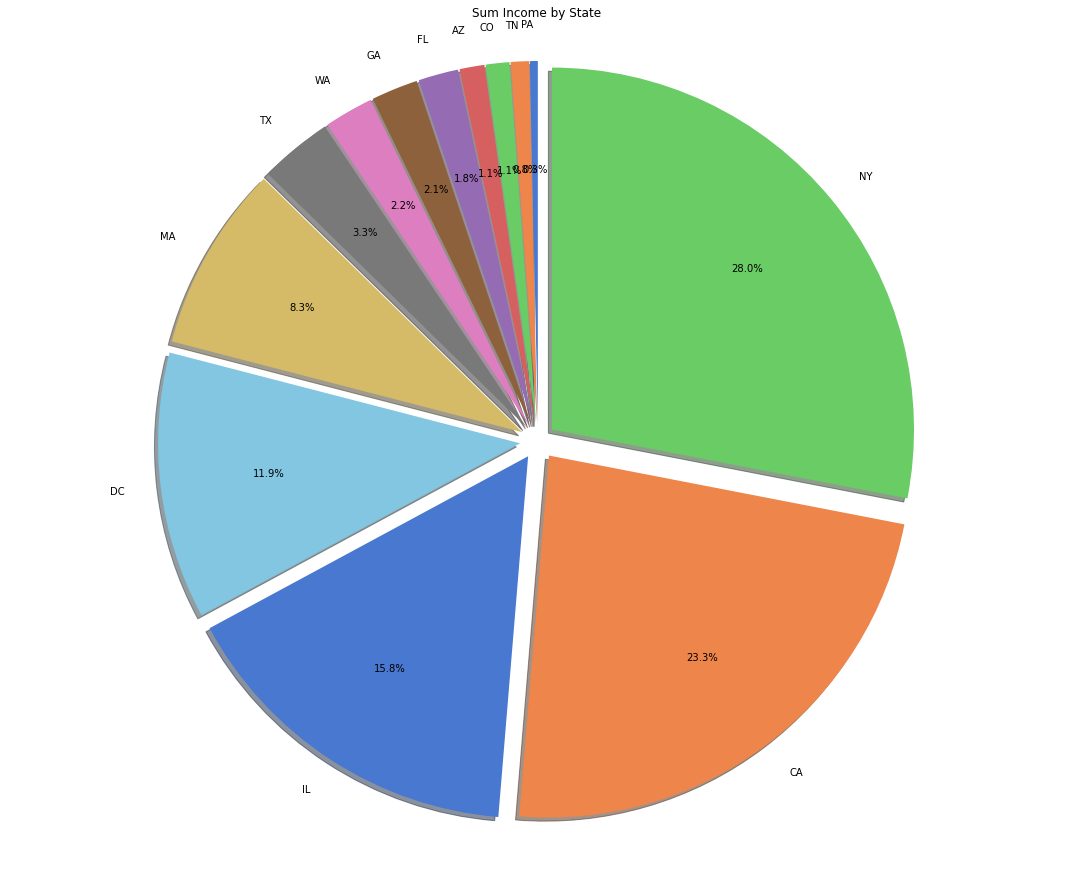

In [38]:
# Calculate sum of income by state
state_income = master_data.groupby("State").agg({"Income (USD/Month)": "sum"}).sort_values('Income (USD/Month)').reset_index()
state_income.columns = ['State', 'Income (USD/Month)']

# Define the figure and axes
fig, ax = plt.subplots(figsize=(15, 12))

# Define text properties
textprops = {"fontsize": 10}

# Define explode values for pie chart
explodes = [0.1] * len(state_income)

# Plot pie chart
pie_properties = ax.pie(data=state_income, x='Income (USD/Month)', labels='State', pctdistance=0.7,
                        autopct='%1.1f%%',
                        colors=sns.color_palette("muted"), radius=2,
                        explode=explodes, shadow=True, startangle=90, textprops=textprops)

# Adjust layout
plt.axis('equal')
plt.tight_layout()
plt.title("Sum Income by State")

# Show plot
plt.show()

New York in generating the highest state income from cab users, followed by California, Illinois, and DC.

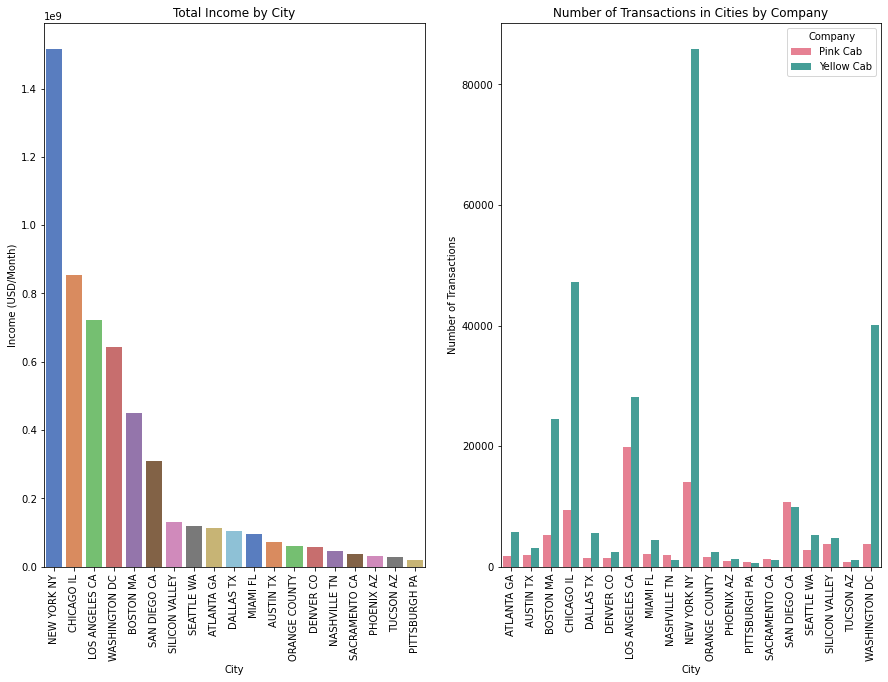

In [39]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Subplot 1: Total Income by City
plt.subplot(1, 2, 1)

# Grouping data by city and summing income
grouped_city_income = master_data.groupby('City')['Income (USD/Month)'].sum().sort_values(ascending=False).reset_index()

# Creating the bar plot
ax = sns.barplot(data=grouped_city_income, x='City', y='Income (USD/Month)', palette='muted')
plt.title("Total Income by City")
plt.xticks(rotation=90)

# Subplot 2: Number of Customers in Cities by Company
plt.subplot(1, 2, 2)

# Grouping data by company and city, counting the number of transactions, and sorting by count in descending order
grouped_company_city = master_data.groupby(['Company', 'City'])['Transaction ID'].count().reset_index()

# Creating the clustered bar plot
sns.barplot(data=grouped_company_city, x="City", hue="Company", y='Transaction ID', palette="husl", dodge= True)

# Set title and adjust layout
plt.title("Number of Transactions in Cities by Company")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Transactions")

#Show the combined plot
plt.show()

New York city generates highest income and number of cab users followed by Chicago, LA and Washington DC

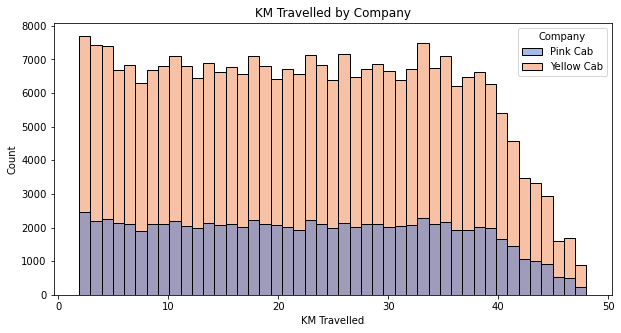

In [40]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the histogram
ax = sns.histplot(data=master_data, x="KM Travelled", hue="Company", bins=45, palette="muted")

# Set title
plt.title("KM Travelled by Company")

# Show the plot
plt.show()

Most rides in the range from 2km to 48 km

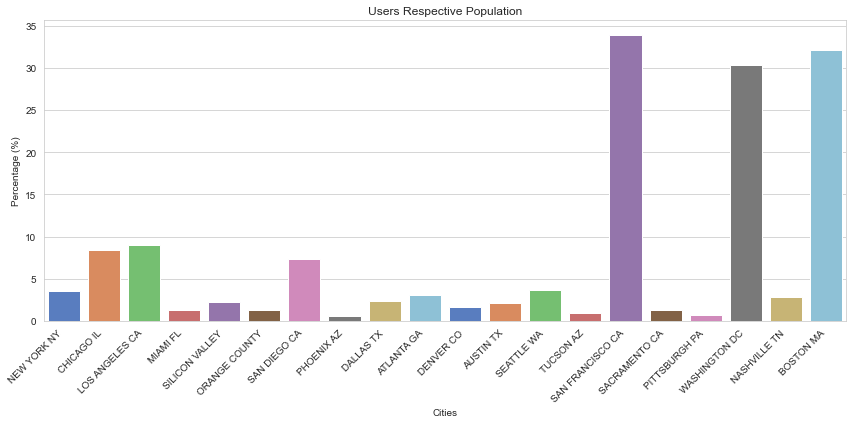

In [41]:
# Calculate Users Respective Population (URP)
city_data['URP'] = (city_data['Users'] / city_data['Population']) * 100 

# Set the style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=city_data, x='City', y='URP', palette='muted')

# Set title
plt.title('Users Respective Population')
plt.xlabel('Cities')
plt.ylabel('Percentage (%)')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')  

# Adjust layout to prevent clipping of labels
plt.tight_layout() 

# Show the plot
plt.show()

In cities such as San Francisco, Washington, and Boston, the cab service is utilized by over 30% of the population.

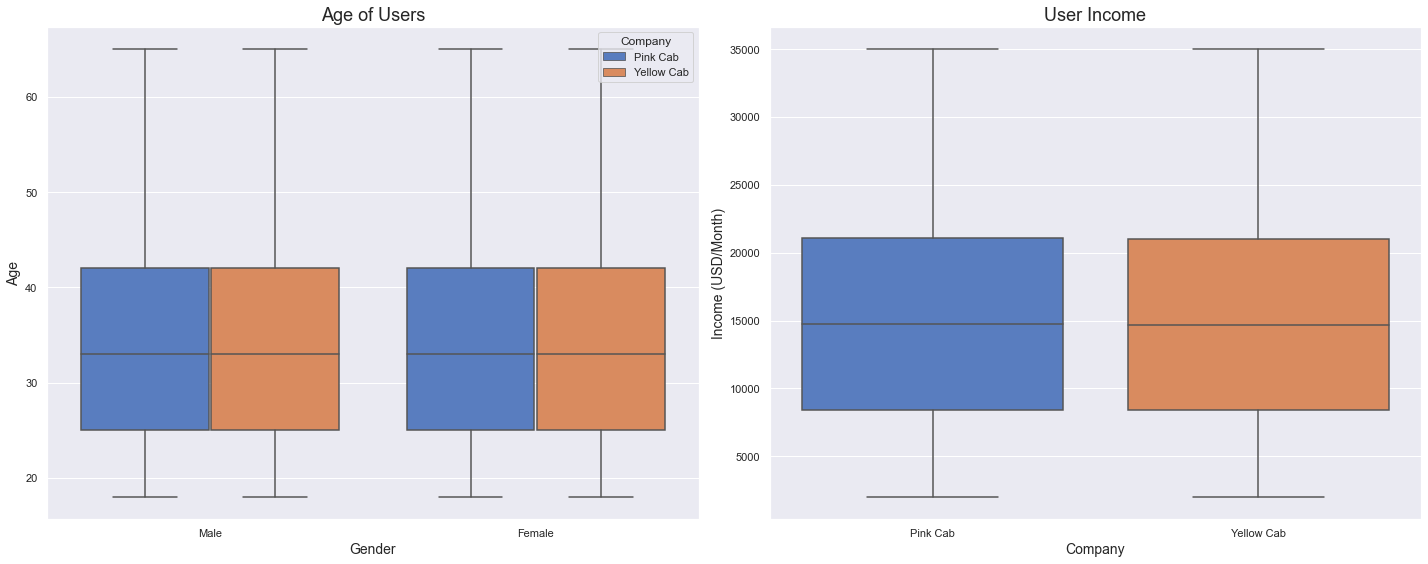

In [42]:
sns.set(style='darkgrid')

plt.figure(figsize=(20, 8))

# Plot for average age of users
plt.subplot(1, 2, 1)
sns.boxplot(data=master_data, x='Gender', y='Age', hue='Company', palette='muted')
plt.title('Age of Users', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Company', loc='upper right')

# Plot for user income
plt.subplot(1, 2, 2)

sns.boxplot(data=master_data, x='Company', y='Income (USD/Month)', palette='muted')
plt.title('User Income', fontsize=18)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Income (USD/Month)', fontsize=14)

plt.tight_layout()
plt.show()


- Average age of users is 33 years.
- Avergae user income is $15000.

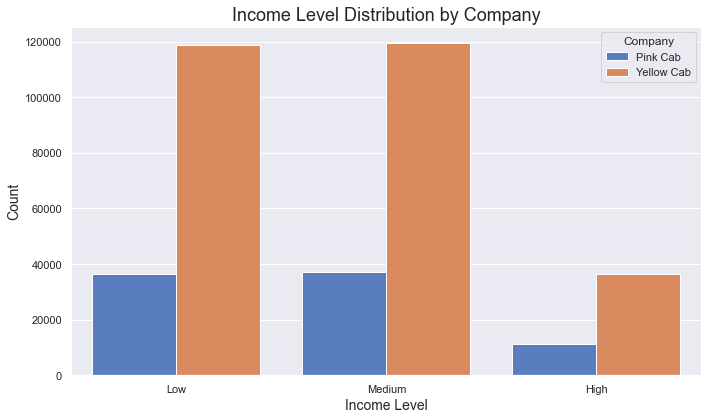

In [43]:
# Define income levels
income_levels = ['Low', 'Medium', 'High']

# Categorize income into levels
master_data['Income Level'] = pd.cut(master_data['Income (USD/Month)'], bins=3, labels=income_levels)

# Plot for user income
plt.figure(figsize=(10, 6))
sns.countplot(data=master_data, x='Income Level', hue='Company', palette='muted')

plt.title('Income Level Distribution by Company', fontsize=18)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Company')

plt.tight_layout()
plt.show()

Yellow cab is popular among users from different income levels.

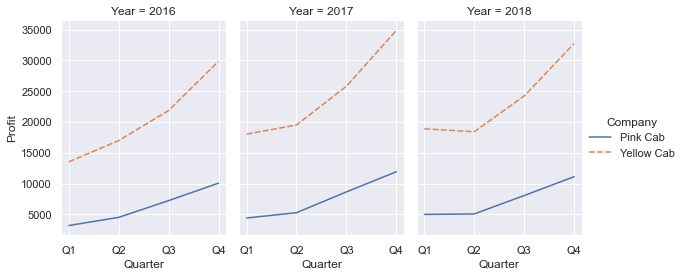

In [44]:
# Extract month and quarter from Date of Travel
master_data["Month"] = master_data["Date of Travel"].dt.month
master_data["Year"] = master_data["Date of Travel"].dt.year
master_data["Quarter"] = pd.cut(master_data["Month"], bins=[0, 3, 6, 9, 12], labels=["Q1", "Q2", "Q3", "Q4"])

# Group by Quarter, Company, and Year and count the number of profits
group = master_data.groupby(['Quarter', 'Company', 'Year'])['Profit'].count().reset_index()

# Plot using seaborn's relplot
sns.relplot(
    data=group,
    x="Quarter", y="Profit",
    hue="Company", style="Company", col="Year",
    height=4, aspect=.7, kind="line"
)


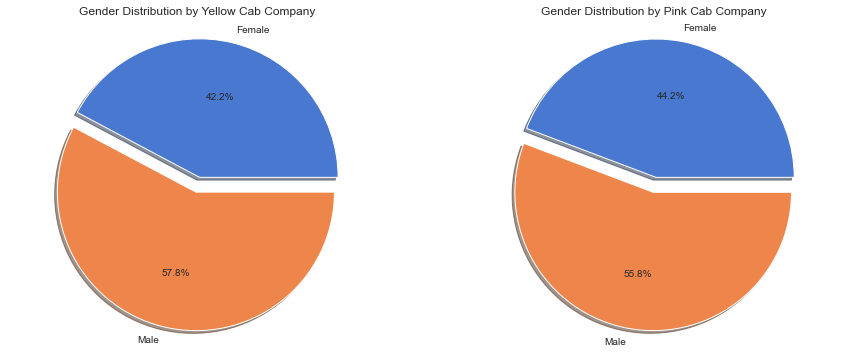

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

agg_dict = {'Transaction ID': 'count'}

# Filter data for Yellow Cab
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']
yellow_group = yellow_data.groupby('Gender').agg(agg_dict).reset_index()

# Plot for Yellow Cab
colors = sns.color_palette("muted")
explode = [0.1, 0.01]
axs[0].pie(data=yellow_group, x='Transaction ID', labels='Gender', colors=colors, 
           explode=explode, autopct='%1.1f%%', shadow=True, textprops={"fontsize": 10})
axs[0].set_title("Gender Distribution by Yellow Cab Company", fontsize=12)
axs[0].axis('equal')

# Filter data for Pink Cab
pink_data = master_data[master_data['Company'] == 'Pink Cab']
pink_group = pink_data.groupby('Gender').agg(agg_dict).reset_index()

# Plot for Pink Cab
axs[1].pie(data=pink_group, x='Transaction ID', labels='Gender', colors=colors, 
           explode=explode, autopct='%1.1f%%', shadow=True, textprops={"fontsize": 10})
axs[1].set_title("Gender Distribution by Pink Cab Company", fontsize=12)
axs[1].axis('equal')

plt.show()


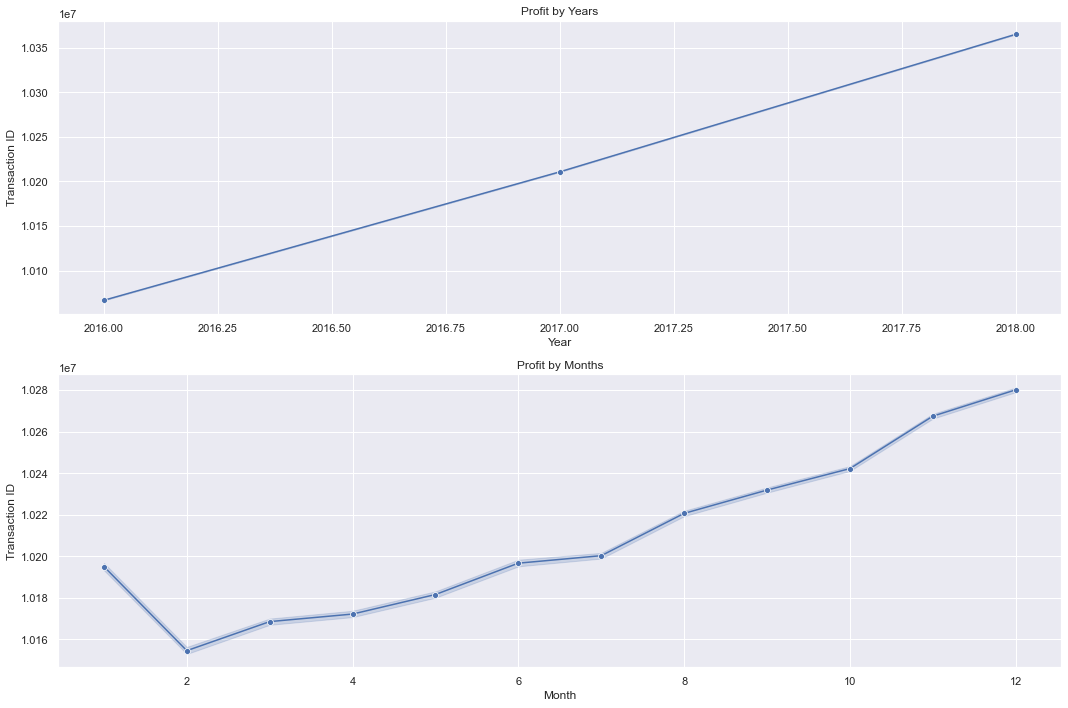

In [46]:
import plotly.express as px

# Plot for Age Frequency
age_counts = master_data.groupby(['Company', 'Age']).size().reset_index(name='Frequency')

fig = px.bar(age_counts, x='Age', y='Frequency', color='Company', 
             title='Age Frequency by Company', labels={'Age': 'Age', 'Frequency': 'Frequency'})
fig.update_layout(title_x=0.5, showlegend=True)
fig.show()

# Plot for Profit by Years and Months
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Profit by Years
axs[0].set_title("Profit by Years")
sns.lineplot(data=master_data, x='Year', y='Transaction ID', marker='o', ax=axs[0], palette="rocket_r")

# Profit by Months
axs[1].set_title("Profit by Months")
sns.lineplot(data=master_data, x='Month', y='Transaction ID', marker='o', ax=axs[1], palette="rocket_r")

plt.tight_layout()
plt.show()


- Yellow cab is more popular in all the age groups.
- Cab is more popular among users under 40 years of age.
-Profit margin decreases by years for both companies. 
- Profit margin varies with months

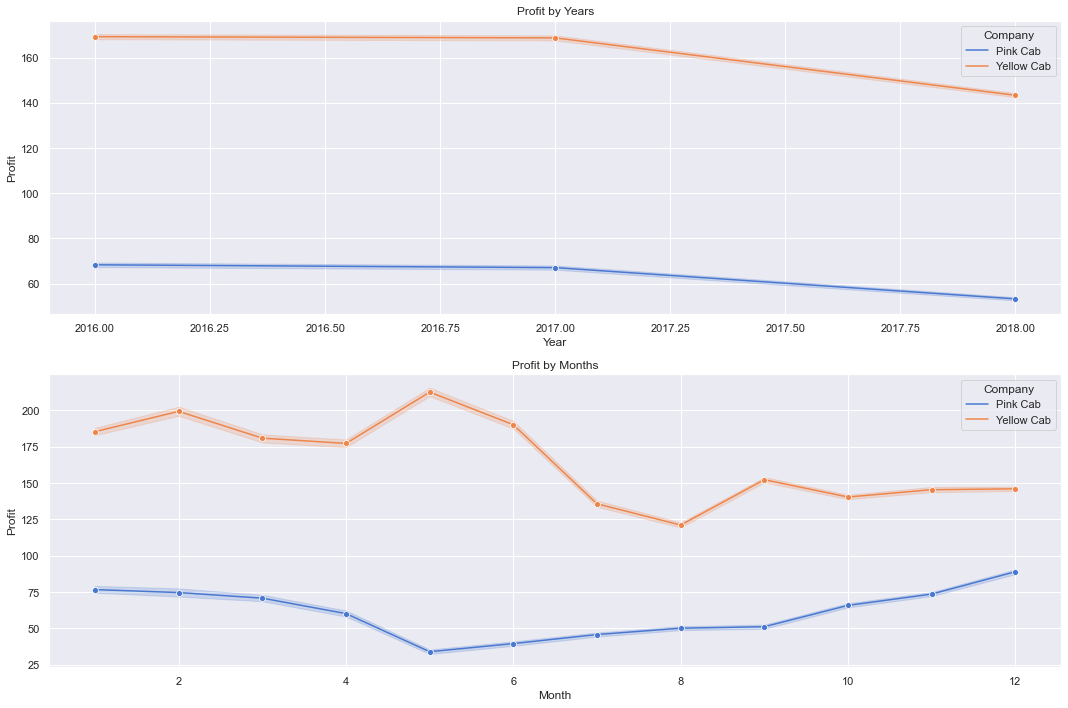

In [47]:
# Examination of the dataset in monthly and annual periods
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Profit by Years
axs[0].set_title("Profit by Years")
sns.lineplot(data=master_data, x='Year', y='Profit', hue="Company", marker='o', ax=axs[0], palette="muted")

# Profit by Months
axs[1].set_title("Profit by Months")
sns.lineplot(data=master_data, x='Month', y='Profit', hue="Company", marker='o', ax=axs[1], palette="muted")

plt.tight_layout()
plt.show()


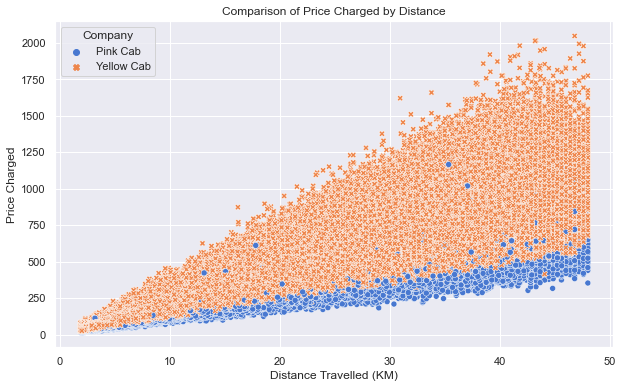

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=master_data, x='KM Travelled', y='Price Charged', 
                hue='Company', style='Company', palette='muted')
plt.title('Comparison of Price Charged by Distance')
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Price Charged')
plt.legend(title='Company', loc='upper left')
plt.grid(True)
plt.show()

We observe a linear relationship between the distance traveled (KM) and the price charged, as anticipated. Yellow Cab tends to have higher charges compared to Pink Cab.

# 4. Multiple Hypothesis Testing

**Hypothesis 1: Is there any difference in profit regarding Gender  
H0: there no a difference in profit regarding gender  
H1: there is a difference in profit regarding gender**

In [49]:
# Pink Cab
a_pink_male = master_data[(master_data.Gender == 'Male') & (master_data.Company == 'Pink Cab')].groupby('Transaction ID').Profit.mean()
b_pink_female = master_data[(master_data.Gender == 'Female') & (master_data.Company == 'Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value_pink = stats.ttest_ind(a_pink_male.values, b_pink_female.values, equal_var=True)

print('Pink Cab - P value:', p_value_pink)

if p_value_pink < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a difference in profit regarding gender for Pink Cab')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit regarding gender for Pink Cab')

print("\n")
# Yellow Cab
a_yellow_male = master_data[(master_data.Gender == 'Male') & (master_data.Company == 'Yellow Cab')].groupby('Transaction ID').Profit.mean()
b_yellow_female = master_data[(master_data.Gender == 'Female') & (master_data.Company == 'Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value_yellow = stats.ttest_ind(a_yellow_male.values, b_yellow_female.values, equal_var=True)

print('Yellow Cab - P value:', p_value_yellow)

if p_value_yellow < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a difference in profit regarding gender for Yellow Cab')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit regarding gender for Yellow Cab')


Pink Cab - P value: 0.11515305900425798
We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit regarding gender for Pink Cab


Yellow Cab - P value: 6.060473042494144e-25
We reject the null hypothesis (H0) and conclude that there is a difference in profit regarding gender for Yellow Cab


**Hypothesis 2: Is there a difference in profit between Pink Cab and Yellow Cab companies?  
H0: there no a difference in profit between Pink Cab and Yellow Cab companies  
H1: there is a difference in profit between Pink Cab and Yellow Cab companies**

In [50]:
pink_profit = master_data[master_data['Company'] == 'Pink Cab']['Profit']
yellow_profit = master_data[master_data['Company'] == 'Yellow Cab']['Profit']

_, p_value_profit = stats.ttest_ind(pink_profit, yellow_profit, equal_var=True)

print('Profit Difference between Pink Cab and Yellow Cab - P value:', p_value_profit)

if p_value_profit < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a difference in profit between Pink Cab and Yellow Cab companies.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit between Pink Cab and Yellow Cab companies.')


Profit Difference between Pink Cab and Yellow Cab - P value: 0.0
We reject the null hypothesis (H0) and conclude that there is a difference in profit between Pink Cab and Yellow Cab companies.


**Hypothesis 3: Does the day of the week affect the number of transactions?  
H0: the day of the week does not affect the number of transactions  
H1: the day of the week affects the number of transactions**

In [51]:
agg_dict = {
    'Transaction ID': 'count'
}
transactions_day = master_data.groupby(master_data['Date of Travel'].dt.dayofweek)['Transaction ID'].agg('count')

_, p_value_day_transactions = stats.ttest_1samp(transactions_day, transactions_day.mean())

print('Day of the Week vs Transactions - P value:', p_value_day_transactions)

if p_value_day_transactions < 0.05:
    print('We reject the null hypothesis (H0) and conclude that the day of the week affects the number of transactions.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that the day of the week does not affect the number of transactions.')


Day of the Week vs Transactions - P value: 1.0
We fail to reject the null hypothesis (H0) and conclude that the day of the week does not affect the number of transactions.


**Hypothesis 4: Is there significant difference in average income of customers between Pink Cab and Yellow Cab companies?  
H0: there is no significant difference in the average income of customers between Pink Cab and Yellow Cab companies  
H1: there is a significant difference in the average income of customers between Pink Cab and Yellow Cab companies**

In [52]:
pink_income = master_data[master_data['Company'] == 'Pink Cab']['Income (USD/Month)']
yellow_income = master_data[master_data['Company'] == 'Yellow Cab']['Income (USD/Month)']

_, p_value_income = stats.ttest_ind(pink_income, yellow_income, equal_var=True)

print('Income Difference between Pink Cab and Yellow Cab - P value:', p_value_income)

if p_value_income < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a significant difference in the average income of customers between Pink Cab and Yellow Cab companies.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no significant difference in the average income of customers between Pink Cab and Yellow Cab companies.')


Income Difference between Pink Cab and Yellow Cab - P value: 0.6692975005750657
We fail to reject the null hypothesis (H0) and conclude that there is no significant difference in the average income of customers between Pink Cab and Yellow Cab companies.


**Hypothesis 5: Are there any differences in profit between different age groups?  
H0: there are no differences in profit between different age groups  
H1: there are differences in profit between different age groups**

In [53]:
young_profit = master_data[master_data['Age'] <= 30]['Profit']
middle_age_profit = master_data[(master_data['Age'] > 30) & (master_data['Age'] <= 60)]['Profit']
elderly_profit = master_data[master_data['Age'] > 60]['Profit']

_, p_value_age_profit = stats.f_oneway(young_profit, middle_age_profit, elderly_profit)

print('Profit Differences among Age Groups - P value:', p_value_age_profit)

if p_value_age_profit < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there are differences in profit between different age groups.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there are no differences in profit between different age groups.')

Profit Differences among Age Groups - P value: 6.871488643374559e-09
We reject the null hypothesis (H0) and conclude that there are differences in profit between different age groups.


**Hypothesis 6: Does the distance traveled affect the profit earned by the company?  
H0: the distance traveled does not affect the profit earned by the company  
H1: the distance traveled affects the profit earned by the company**

In [54]:
correlation_distance_profit, p_value_distance_profit = stats.pearsonr(master_data['KM Travelled'], master_data['Profit'])

print('Correlation between Distance Traveled and Profit - P value:', p_value_distance_profit)

if p_value_distance_profit < 0.05:
    print('We reject the null hypothesis (H0) and conclude that the distance traveled affects the profit earned by the company.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that the distance traveled does not affect the profit earned by the company.')

Correlation between Distance Traveled and Profit - P value: 0.0
We reject the null hypothesis (H0) and conclude that the distance traveled affects the profit earned by the company.


**Hypothesis 7: Is there a difference in profit between transactions paid with cash and those paid with card?  
H0: there is no difference in profit between transactions paid with cash and those paid with card  
H1: there is a difference in profit between transactions paid with cash and those paid with card**

In [55]:
## Pink Cab
cash_profit_pink = master_data[(master_data['Payment_Mode'] == 'Cash') & (master_data['Company'] == 'Pink Cab')]['Profit']
card_profit_pink = master_data[(master_data['Payment_Mode'] == 'Card') & (master_data['Company'] == 'Pink Cab')]['Profit']

_, p_value_payment_mode_pink = stats.ttest_ind(cash_profit_pink, card_profit_pink, equal_var=True)

print('Payment Mode Difference for Pink Cab - P value:', p_value_payment_mode_pink)

if p_value_payment_mode_pink < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a difference in profit between transactions paid with cash and those paid with card for Pink Cab.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit between transactions paid with cash and those paid with card for Pink Cab.')

print('\n')
## Yellow Cab
cash_profit_yellow = master_data[(master_data['Payment_Mode'] == 'Cash') & (master_data['Company'] == 'Yellow Cab')]['Profit']
card_profit_yellow = master_data[(master_data['Payment_Mode'] == 'Card') & (master_data['Company'] == 'Yellow Cab')]['Profit']

_, p_value_payment_mode_yellow = stats.ttest_ind(cash_profit_yellow, card_profit_yellow, equal_var=True)

print('Payment Mode Difference for Yellow Cab - P value:', p_value_payment_mode_yellow)

if p_value_payment_mode_yellow < 0.05:
    print('We reject the null hypothesis (H0) and conclude that there is a difference in profit between transactions paid with cash and those paid with card for Yellow Cab.')
else:
    print('We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit between transactions paid with cash and those paid with card for Yellow Cab.')


Payment Mode Difference for Pink Cab - P value: 0.7900465828792986
We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit between transactions paid with cash and those paid with card for Pink Cab.


Payment Mode Difference for Yellow Cab - P value: 0.2933060638298338
We fail to reject the null hypothesis (H0) and conclude that there is no difference in profit between transactions paid with cash and those paid with card for Yellow Cab.
